In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Normalizacion --> MinMaxScaler, StandardScaler
# Imagenes --> colorPixel/255                imagen --> vector
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
df = pd.read_csv('FINAL_USO.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1718.0,1.273234e+02,1.752699e+01,1.009200e+02,1.162200e+02,1.219150e+02,1.284275e+02,1.732000e+02
High,1718.0,1.278542e+02,1.763119e+01,1.009900e+02,1.165400e+02,1.223250e+02,1.290875e+02,1.740700e+02
Low,1718.0,1.267777e+02,1.739651e+01,1.002300e+02,1.157400e+02,1.213700e+02,1.278400e+02,1.729200e+02
Close,1718.0,1.273195e+02,1.753627e+01,1.005000e+02,1.160525e+02,1.217950e+02,1.284700e+02,1.736100e+02
Adj Close,1718.0,1.273195e+02,1.753627e+01,1.005000e+02,1.160525e+02,1.217950e+02,1.284700e+02,1.736100e+02
...,...,...,...,...,...,...,...,...
USO_High,1718.0,2.230715e+01,1.147867e+01,8.030000e+00,1.150000e+01,1.663500e+01,3.466750e+01,4.230000e+01
USO_Low,1718.0,2.190466e+01,1.137400e+01,7.670000e+00,1.130000e+01,1.604000e+01,3.411000e+01,4.130000e+01
USO_Close,1718.0,2.210905e+01,1.143279e+01,7.960000e+00,1.139250e+01,1.634500e+01,3.441750e+01,4.201000e+01
USO_Adj Close,1718.0,2.210905e+01,1.143279e+01,7.960000e+00,1.139250e+01,1.634500e+01,3.441750e+01,4.201000e+01


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].apply(lambda date: date.year)
df["month"] = df["Date"].apply(lambda date: date.month)
df["day"] = df["Date"].apply(lambda date: date.day)
df = df.drop("Date", axis=1)
#proceso interno de busqueda que saca todos los datos para nuevas columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int64  
 18  EG_open 

<Axes: >

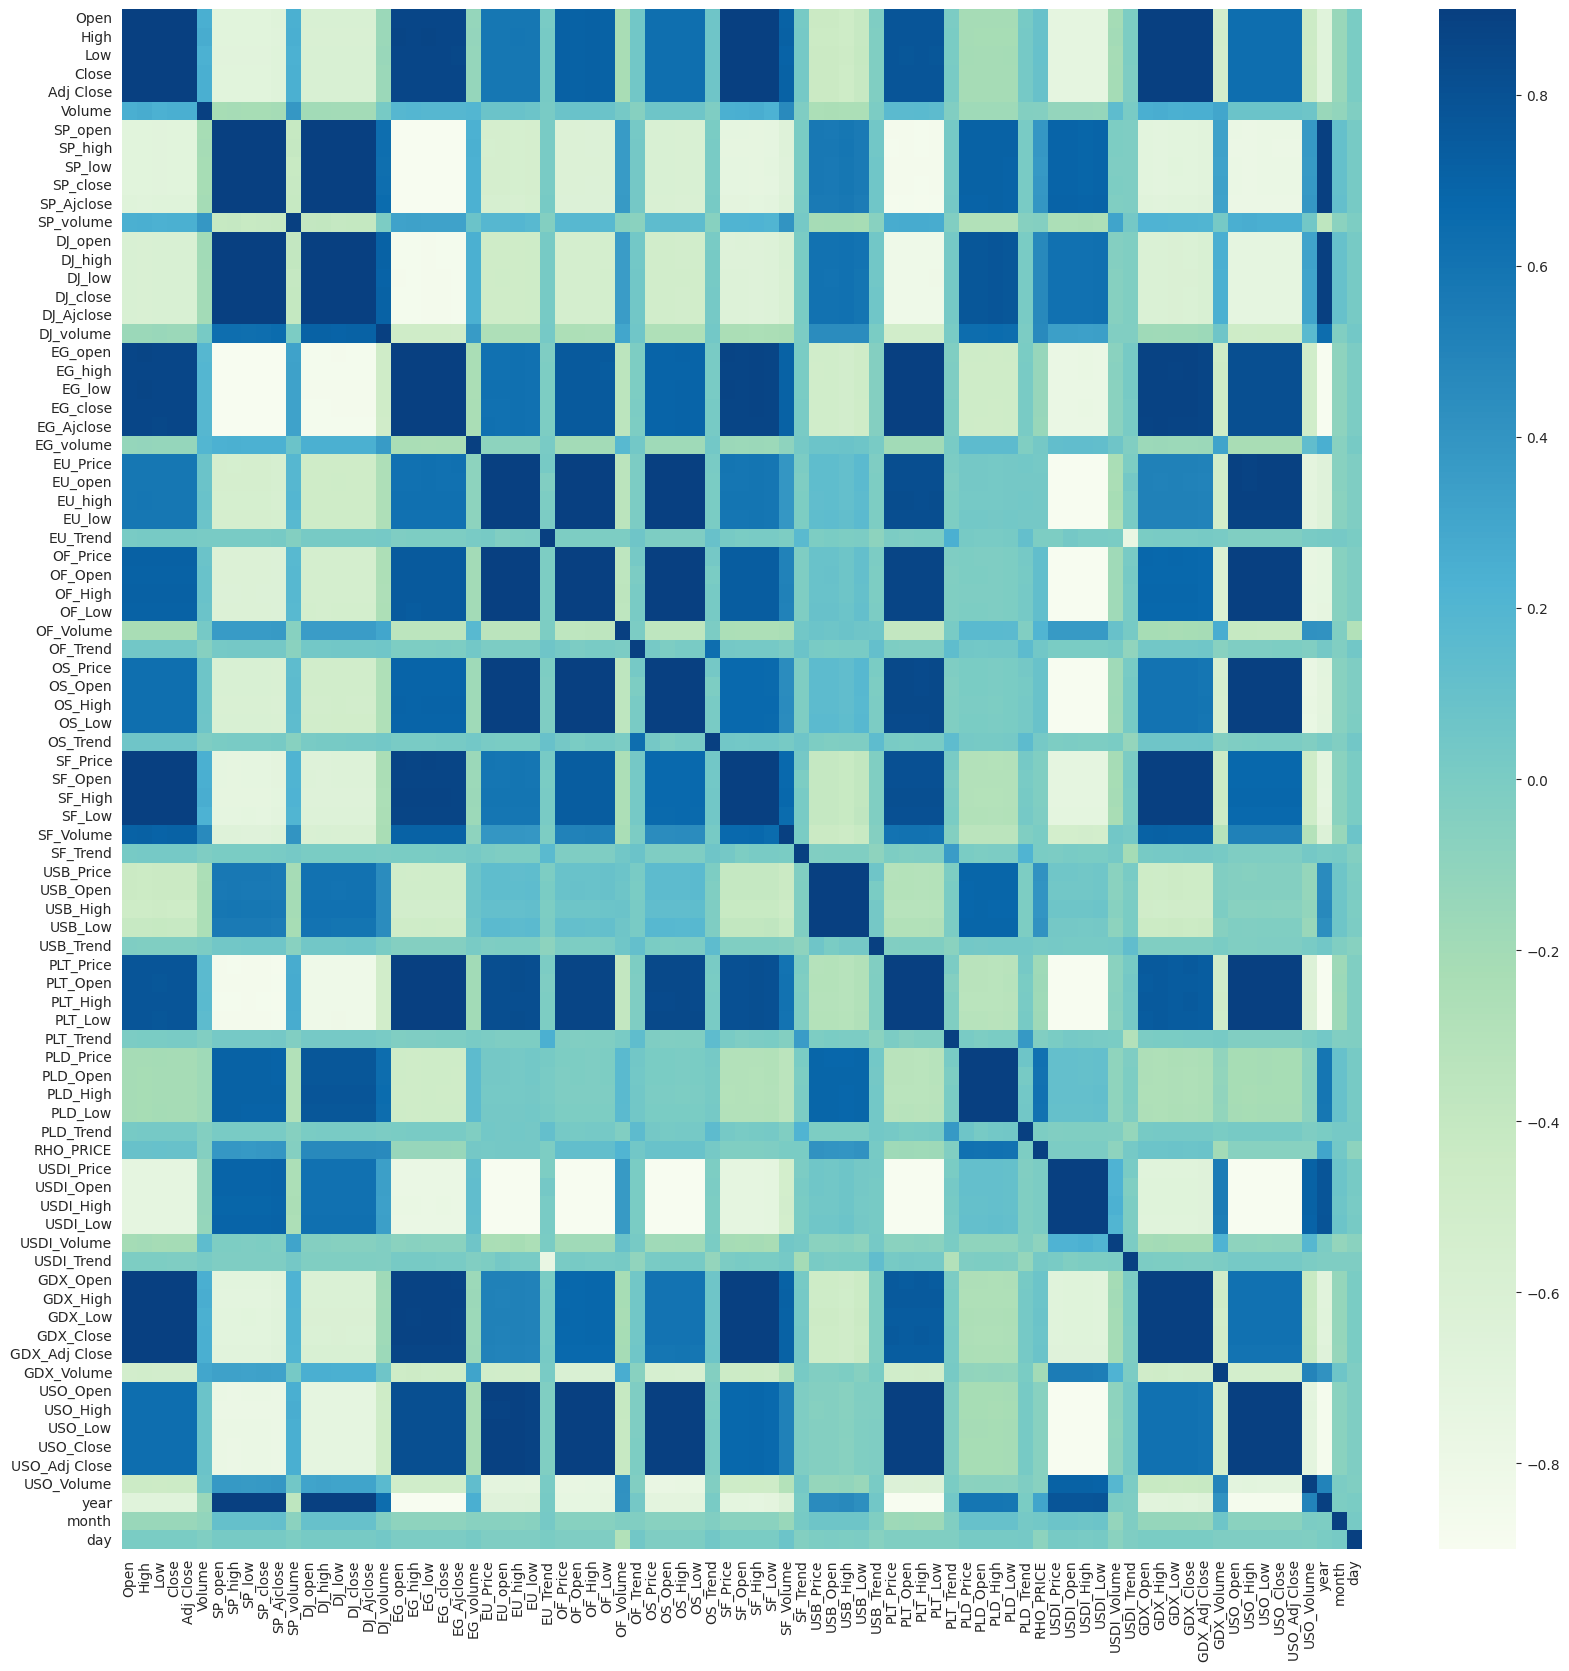

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=False, cmap = "GnBu", vmin=-0.9, vmax=0.9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int64  
 18  EG_open 

In [ ]:
df = df.drop("Volume", axis=1)

In [ ]:
df = df.drop("Open", axis=1)
df = df.drop("High", axis=1)
df = df.drop("Low", axis=1)
#df = df.drop("Close", axis=1)
df = df.drop("Adj Close", axis=1)

In [ ]:
df = df.drop("SF_Price", axis=1)
df = df.drop("SF_Open", axis=1)
df = df.drop("SF_High", axis=1)
df = df.drop("SF_Low", axis=1)
df = df.drop("SF_Trend", axis=1)
df = df.drop("SF_Volume", axis=1)

In [ ]:
df = df.drop("GDX_Volume", axis=1)

In [ ]:
df = df.drop("GDX_Open", axis=1)
df = df.drop("GDX_High", axis=1)
df = df.drop("GDX_Low", axis=1)
df = df.drop("GDX_Close", axis=1)
df = df.drop("GDX_Adj Close", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          1718 non-null   float64
 1   SP_open        1718 non-null   float64
 2   SP_high        1718 non-null   float64
 3   SP_low         1718 non-null   float64
 4   SP_close       1718 non-null   float64
 5   SP_Ajclose     1718 non-null   float64
 6   SP_volume      1718 non-null   int64  
 7   DJ_open        1718 non-null   float64
 8   DJ_high        1718 non-null   float64
 9   DJ_low         1718 non-null   float64
 10  DJ_close       1718 non-null   float64
 11  DJ_Ajclose     1718 non-null   float64
 12  DJ_volume      1718 non-null   int64  
 13  EG_open        1718 non-null   float64
 14  EG_high        1718 non-null   float64
 15  EG_low         1718 non-null   float64
 16  EG_close       1718 non-null   float64
 17  EG_Ajclose     1718 non-null   float64
 18  EG_volum

<Axes: >

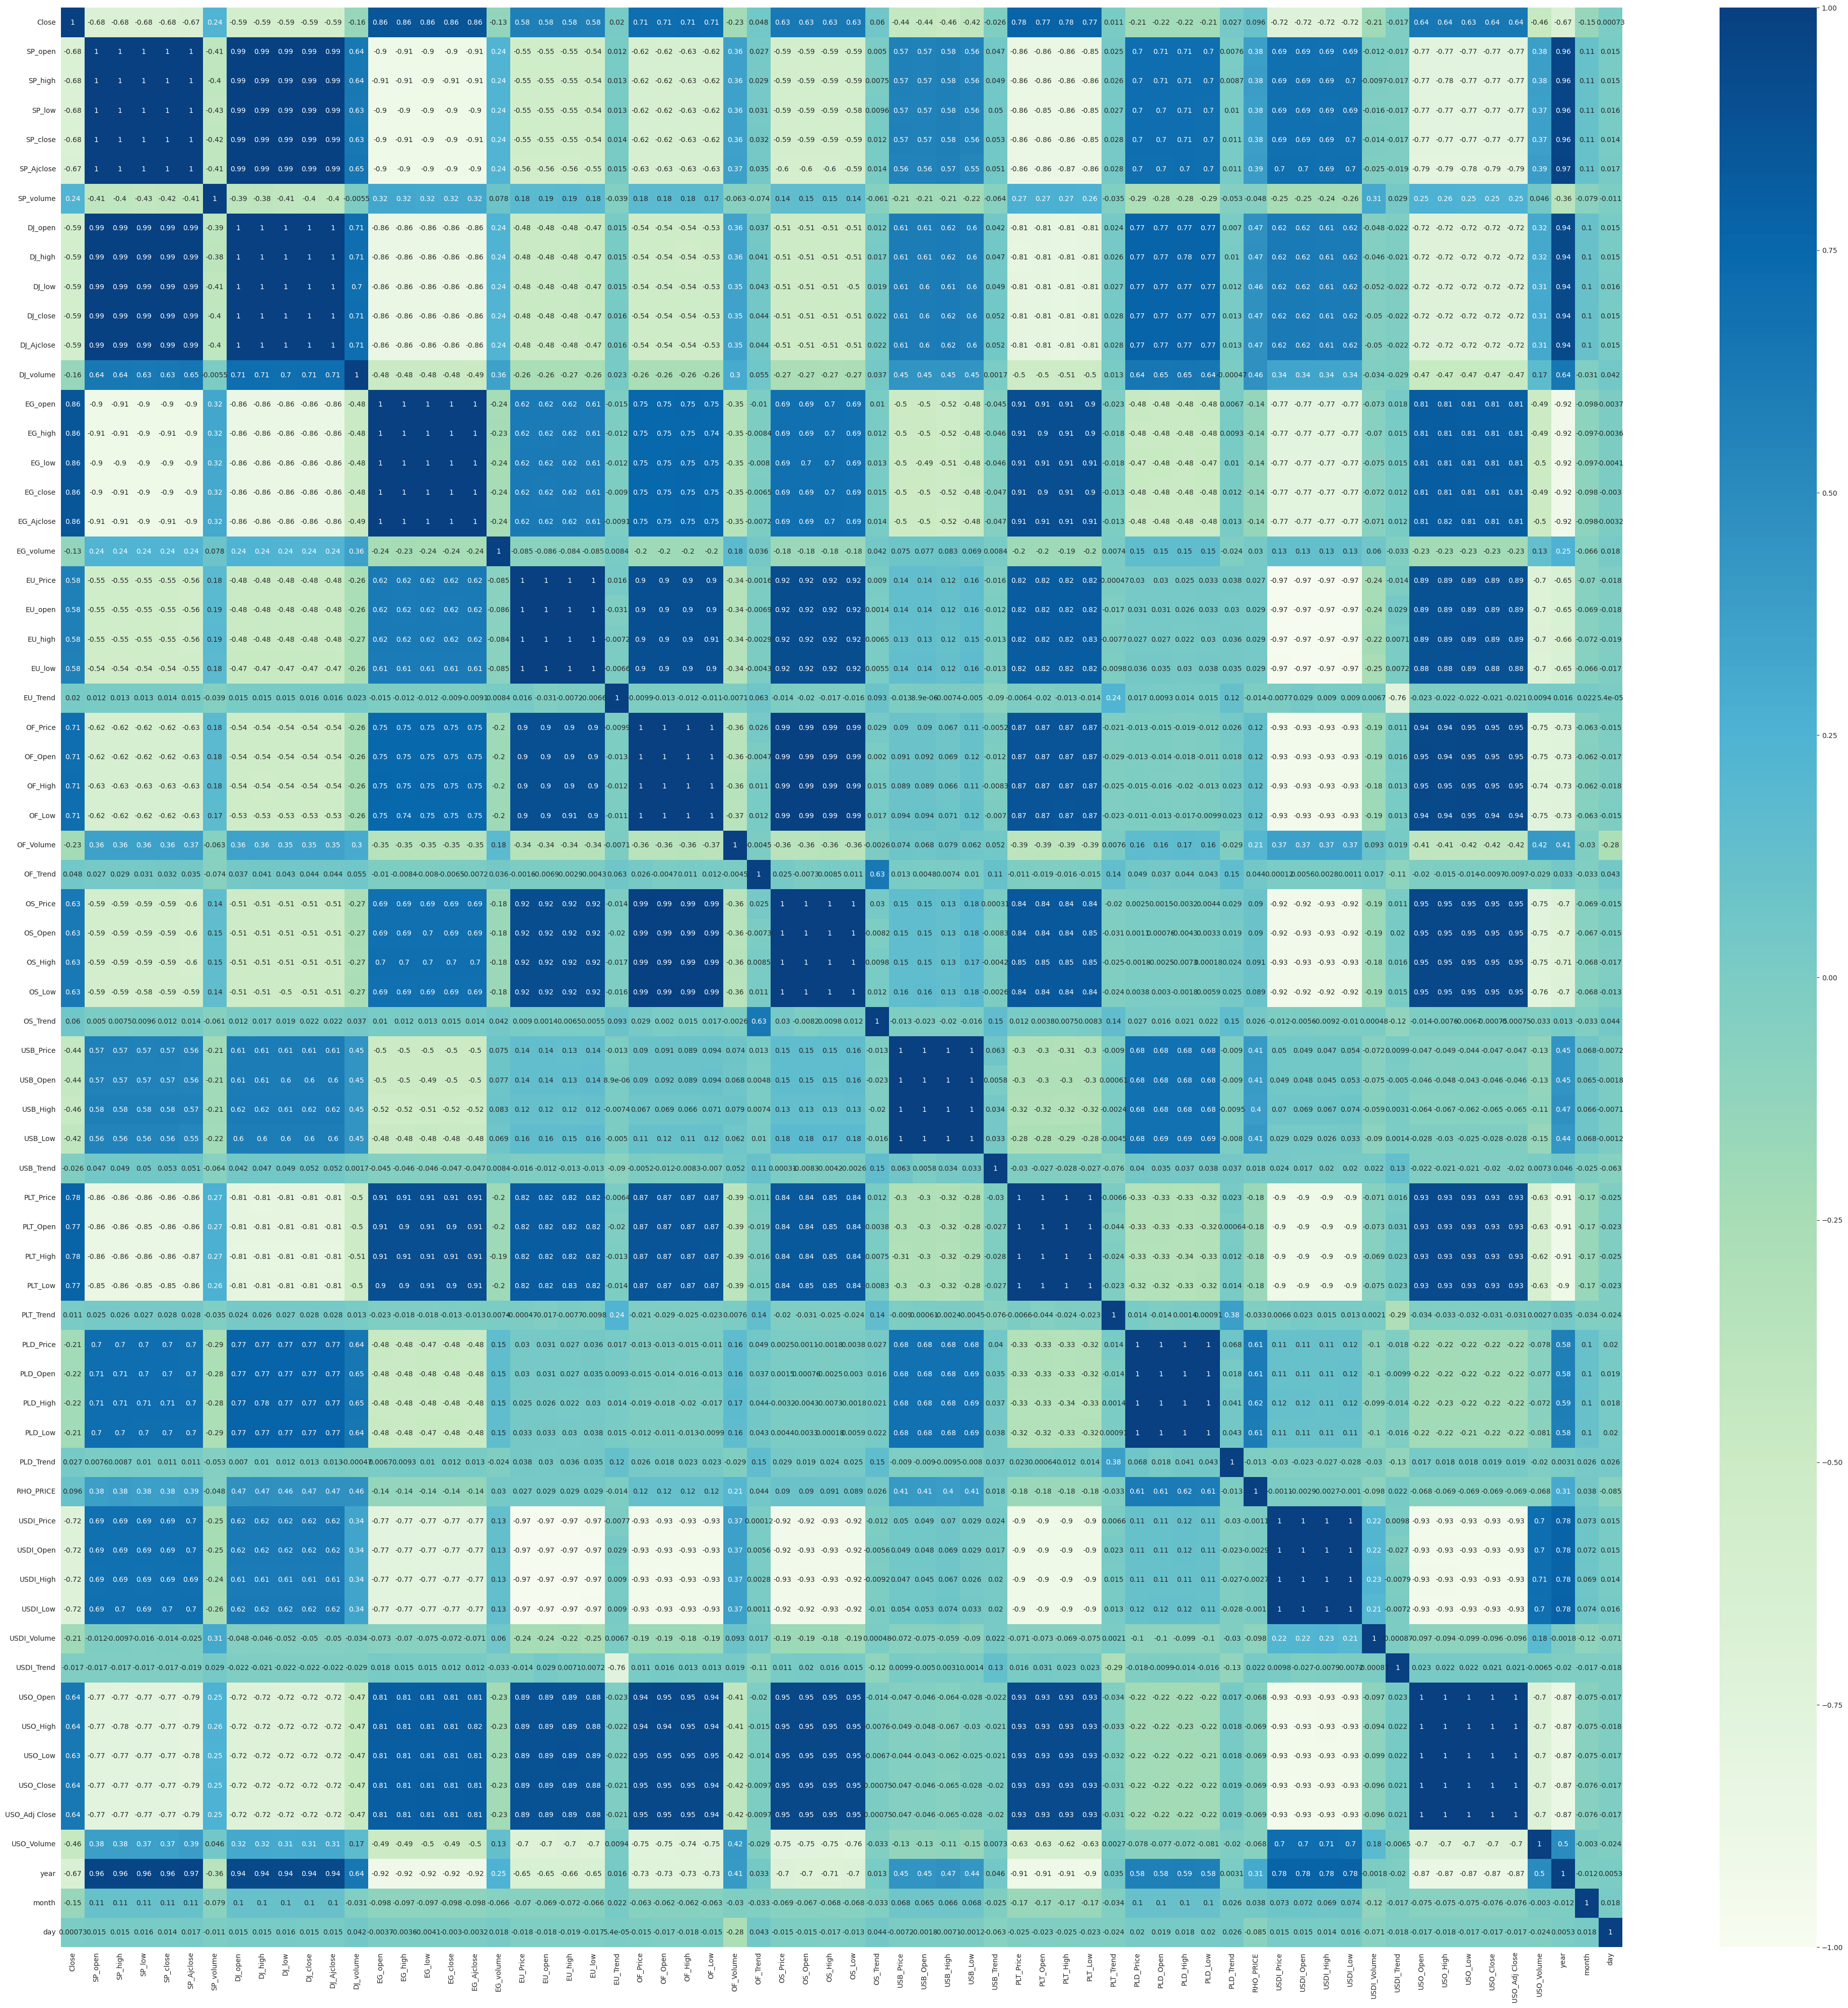

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap = "GnBu", vmin=-1, vmax=1)

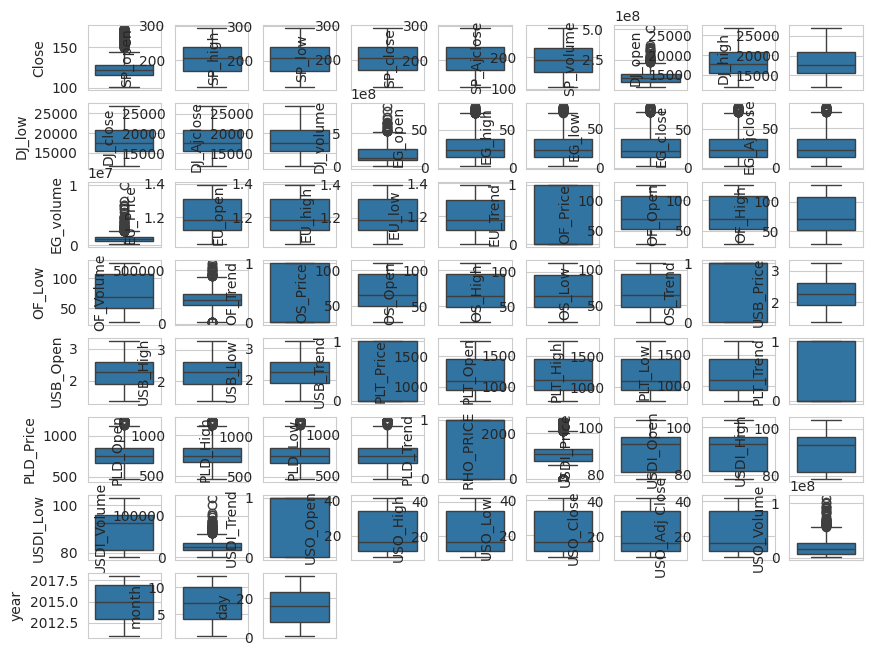

In [ ]:
plt.figure(figsize=(10,10))
c = df.columns
for i in range (len(c)):
  plt.subplot(10,9, i+1)
  sns.boxplot(df[c[i]])

In [ ]:
df.isnull().sum()

,0
Close,0
SP_open,0
SP_high,0
SP_low,0
SP_close,0
...,...
USO_Adj Close,0
USO_Volume,0
year,0
month,0


<Axes: >

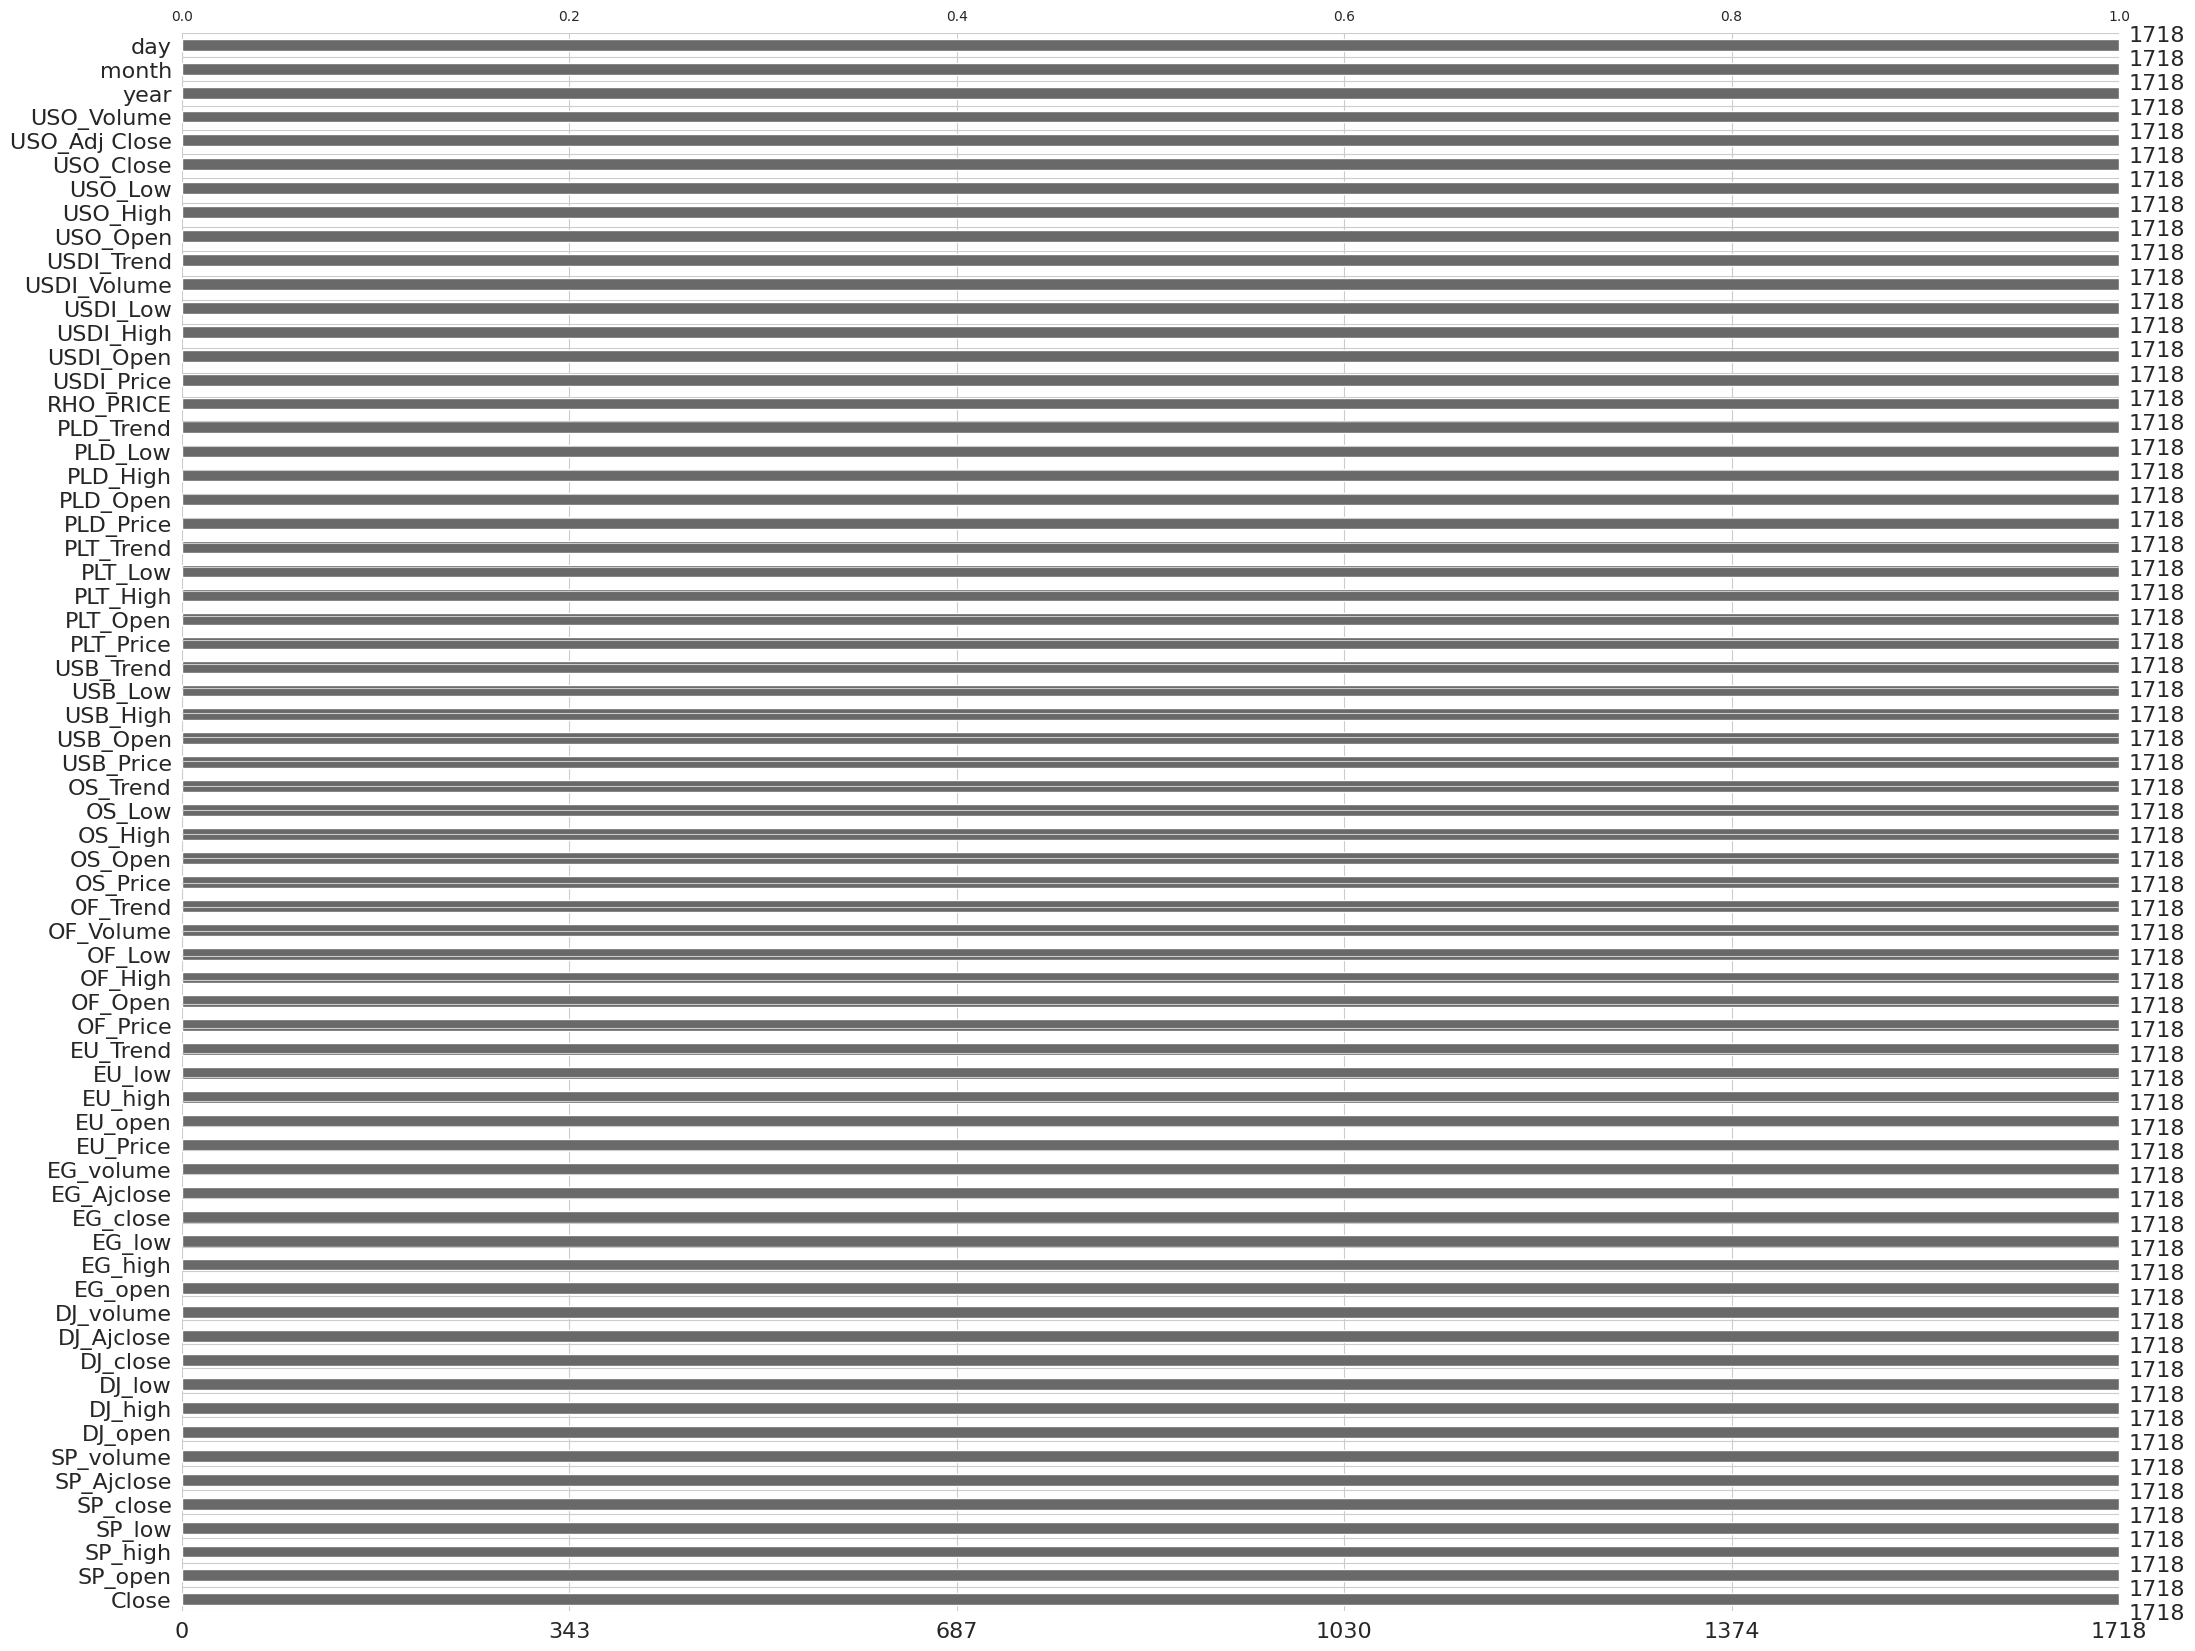

In [ ]:
msno.bar(df)

In [ ]:
x = df.drop("Close", axis=1)
y = df["Close"]